# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | jaciara
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | grong
Processing Record 9 of Set 1 | grimshaw
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mareeba
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | morehead
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | moranbah
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | beisfjord
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | cidreira
Processing Record

Processing Record 37 of Set 4 | udachnyy
Processing Record 38 of Set 4 | yenagoa
Processing Record 39 of Set 4 | merauke
Processing Record 40 of Set 4 | krasnoselkup
Processing Record 41 of Set 4 | eureka
Processing Record 42 of Set 4 | wagar
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | mangai
Processing Record 46 of Set 4 | chambersburg
Processing Record 47 of Set 4 | nara
Processing Record 48 of Set 4 | dossor
Processing Record 49 of Set 4 | zaysan
Processing Record 0 of Set 5 | saint george
Processing Record 1 of Set 5 | macheng
Processing Record 2 of Set 5 | carmo do paranaiba
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | yingzhong
City not found. Skipping...
Processing Record 8 of Set 5 | tecoanapa
Processing Record 9 of Set 5 | faanui
Processing Rec

Processing Record 21 of Set 8 | perth
Processing Record 22 of Set 8 | glenluce
Processing Record 23 of Set 8 | melilla
Processing Record 24 of Set 8 | ormara
Processing Record 25 of Set 8 | yeppoon
Processing Record 26 of Set 8 | valparaiso
Processing Record 27 of Set 8 | kousseri
Processing Record 28 of Set 8 | khatanga
Processing Record 29 of Set 8 | dingle
Processing Record 30 of Set 8 | phetchaburi
Processing Record 31 of Set 8 | grand-bourg
Processing Record 32 of Set 8 | iskateley
Processing Record 33 of Set 8 | coahuayana
Processing Record 34 of Set 8 | skibotn
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | kaitangata
Processing Record 37 of Set 8 | smirnykh
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | ust-tarka
Processing Record 40 of Set 8 | wilson
Processing Record 41 of Set 8 | toora-khem
Processing Record 42 of Set 8 | meadow lake
Processing Record 43 of Set 8 | omboue
Processing Record 44 of Set 8 | antofagasta
Proce

Processing Record 11 of Set 12 | ola
Processing Record 12 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 13 of Set 12 | aljezur
Processing Record 14 of Set 12 | ueda
Processing Record 15 of Set 12 | bumbuna
Processing Record 16 of Set 12 | kedrovyy
Processing Record 17 of Set 12 | muli
Processing Record 18 of Set 12 | sohag
Processing Record 19 of Set 12 | biryusinsk
Processing Record 20 of Set 12 | martapura
Processing Record 21 of Set 12 | coos bay
Processing Record 22 of Set 12 | maumere
Processing Record 23 of Set 12 | lufilufi
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | bira
Processing Record 26 of Set 12 | road town
Processing Record 27 of Set 12 | buchanan
Processing Record 28 of Set 12 | maloy
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | nemuro
Processing Record 31 of Set 12 | verkhnyaya sinyachikha
Processing Record 32 of Set 12 | assare
Processing Record 33 of Set 12 | teknaf
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-5.99,79,100,10.80,GL,1669865129
1,hasaki,35.7333,140.8333,10.22,77,100,8.07,JP,1669865130
2,torbay,47.6666,-52.7314,-4.29,86,0,3.09,CA,1669865131
3,bluff,-46.6000,168.3333,10.45,59,57,9.24,NZ,1669865133
4,jaciara,-15.9653,-54.9683,21.33,95,100,1.69,BR,1669865136


In [7]:
# Convert Date into a comprehensible format

city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-5.99,79,100,10.80,GL,2022-12-01
1,hasaki,35.7333,140.8333,10.22,77,100,8.07,JP,2022-12-01
2,torbay,47.6666,-52.7314,-4.29,86,0,3.09,CA,2022-12-01
3,bluff,-46.6000,168.3333,10.45,59,57,9.24,NZ,2022-12-01
4,jaciara,-15.9653,-54.9683,21.33,95,100,1.69,BR,2022-12-01


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-5.99,79,100,10.80,GL,2022-12-01
1,hasaki,35.7333,140.8333,10.22,77,100,8.07,JP,2022-12-01
2,torbay,47.6666,-52.7314,-4.29,86,0,3.09,CA,2022-12-01
3,bluff,-46.6000,168.3333,10.45,59,57,9.24,NZ,2022-12-01
4,jaciara,-15.9653,-54.9683,21.33,95,100,1.69,BR,2022-12-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

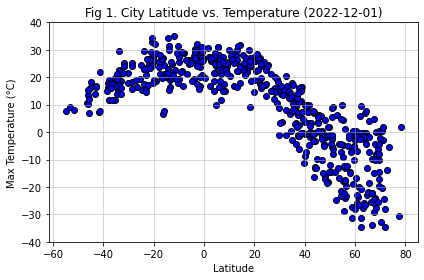

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')


# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.ylim(-40,40)
date=city_data_df['Date'].min()
plt.title(f"Fig 1. City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Fig 1. Observations: This scatterplot maps the temperature of randomly selected cities against their latitude. Higher temperatures are associated with cities that are located close to the equator (Latitude = 0). Temperature tends to decrease in cities that are further away from the equator.

#### Latitude Vs. Humidity

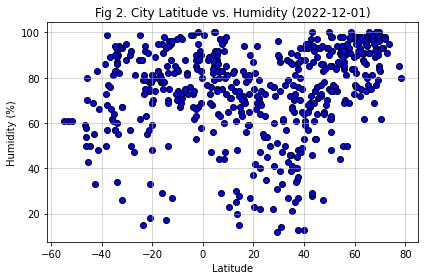

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
date=city_data_df['Date'].min()
plt.title(f"Fig 2. City Latitude vs. Humidity ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Fig 2. Observations: This scatterplot maps the humidity of randomly selected cities against their latitude. In this sample of cities, there seems to be no clear pattern to describe the relationship between latitude and humidity.

#### Latitude Vs. Cloudiness

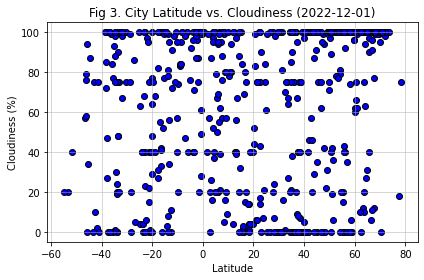

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
date=city_data_df['Date'].min()
plt.title(f"Fig 3. City Latitude vs. Cloudiness ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Fig 3. Observations: This scatterplot maps the cloudiness of randomly selected cities against their latitude. It suggests that there is no clear pattern to describe the relationship between latitude and cloudiness in this sample of cities.

#### Latitude vs. Wind Speed Plot

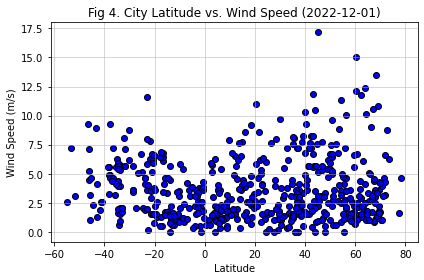

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
date=city_data_df['Date'].min()
plt.title(f"Fig 4. City Latitude vs. Wind Speed ({date})")
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Fig 4. Observations: This scatterplot maps the wind speed of randomly selected cities against their latitude. It suggests that there is no clear pattern to describe the relationship between latitude and wind speed. The wind speed of most of the cities in this sample exist between the 0-7.5 m/s mark.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
## xpos: x coordinates for linear regression equation that is presented the plot.
## ypos: y coordinates for linear regression equation that is presented on the plot.
## x axis label for all plots is Latitude.

def linREGRN(x,y,xpos,ypos):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
        regress_values = x * slope + intercept
        line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x,y)
        plt.plot(x,regress_values,"r-")
        print(f'The r-square value is {rvalue}.')
        plt.annotate(line_eqn,(xpos, ypos),fontsize=15,color="red")
        plt.xlabel('Latitude')
        plt.grid()

# Specifications:
## For each regression plot, add the following: title, yaxis label, and plt.savefig
## Title template: plt.title(f'Fig <n>. Northern Hemisphere/Souther Hemisphere - <Temperature> vs Latitude ({date})')
## plt.savefig("output_data/Fig<n>.png")
## Tweak position of linear regression equation with xpos and ypos

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-5.99,79,100,10.80,GL,2022-12-01
1,hasaki,35.7333,140.8333,10.22,77,100,8.07,JP,2022-12-01
2,torbay,47.6666,-52.7314,-4.29,86,0,3.09,CA,2022-12-01
6,grong,64.4654,12.3149,-0.40,86,27,1.19,NO,2022-12-01
7,grimshaw,56.1834,-117.6027,-24.21,70,40,4.63,CA,2022-12-01


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bluff,-46.6000,168.3333,10.45,59,57,9.24,NZ,2022-12-01
4,jaciara,-15.9653,-54.9683,21.33,95,100,1.69,BR,2022-12-01
5,broken hill,-31.9500,141.4333,25.37,26,67,7.10,AU,2022-12-01
8,atuona,-9.8000,-139.0333,25.62,74,74,5.85,PF,2022-12-01
9,mount gambier,-37.8333,140.7667,19.00,57,47,4.90,AU,2022-12-01


###  Temperature vs. Latitude Linear Regression Plot

The r-square value is -0.8533197815044758.


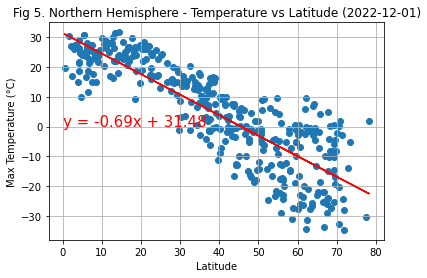

In [59]:
# Specifications
plt.title(f'Fig 5. Northern Hemisphere - Temperature vs Latitude ({date})')
plt.ylabel("Max Temperature (°C)")
xpos=0
ypos=0

# Linear regression on Northern Hemisphere
linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig5.png")
plt.show()

The r-square value is 0.6032260400951723.


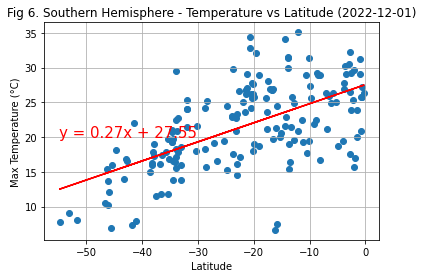

In [60]:
# Specifications
plt.title(f'Fig 6. Southern Hemisphere - Temperature vs Latitude ({date})')
plt.ylabel("Max Temperature (°C)")
xpos=-55
ypos=20

# Linear regression on Southern Hemisphere
linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** The strength of the relationship between maximum temperature and latitude for the Northern and Southern Hemispheres are strong and moderate respectively. In the Northern Hemisphere, temperatures decrease as latitude increases - thus suggesting a negative relationship between those variables. For the Southern Hemisphere, a postive relationship is observed such that temperatures rise as latitude increases. In all, the cities' temperatures tend to increase the closer they are to the equator (Latitude = 0).

### Humidity vs. Latitude Linear Regression Plot

The r-square value is 0.3379424062542878.


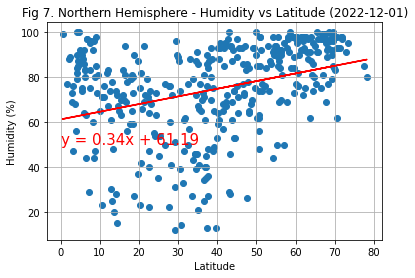

In [61]:
# Specifications
plt.title(f'Fig 7. Northern Hemisphere - Humidity vs Latitude ({date})')
plt.ylabel("Humidity (%)")
xpos=0
ypos=50

# Linear regression on Northern Hemisphere
linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig7.png")
plt.show()

The r-square value is 0.2508095835240102.


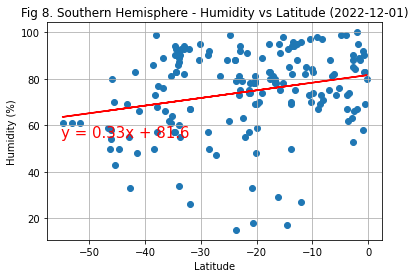

In [62]:
# Specifications
plt.title(f'Fig 8. Southern Hemisphere - Humidity vs Latitude ({date})')
plt.ylabel("Humidity (%)")
xpos=-55
ypos=55

# Linear regression on Southern Hemisphere
linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** The regression plots (Figs 7 & 8) suggest that the relationship between humidity and latitude are weak for both the Northern and Southern Hemispheres. Thus, it is likely that distance from the equator has minimal implications on humidity in the sample of cities considered.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square value is 0.21724861522181815.


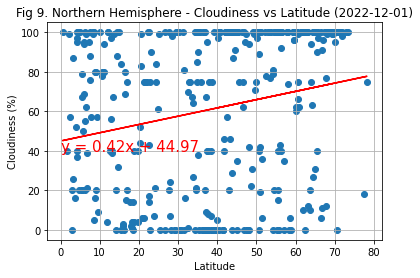

In [63]:
# Specifications
plt.title(f'Fig 9. Northern Hemisphere - Cloudiness vs Latitude ({date})')
plt.ylabel("Cloudiness (%)")
xpos=0
ypos=40

# Linear regression on Northern Hemisphere
linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig9.png")
plt.show()

The r-square value is 0.2562353053970806.


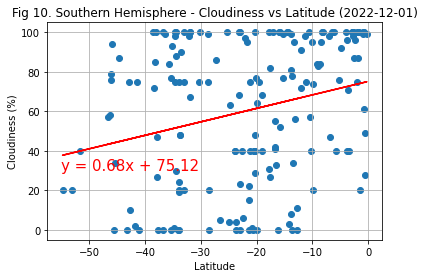

In [64]:
# Specifications
plt.title(f'Fig 10. Southern Hemisphere - Cloudiness vs Latitude ({date})')
plt.ylabel("Cloudiness (%)")
xpos=-55
ypos=30

# Linear regression on Northern Hemisphere
linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** The regression plots (Figs 9 & 10) suggest that the relationship between cloudiness and latitude are very weak in both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square value is 0.14025462649590242.


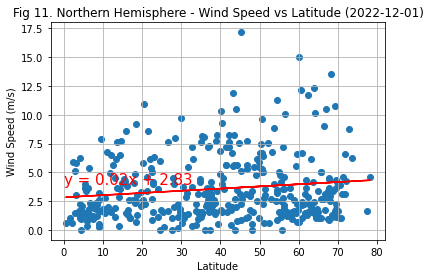

In [65]:
# Specifications
plt.title(f'Fig 11. Northern Hemisphere - Wind Speed vs Latitude ({date})')
plt.ylabel("Wind Speed (m/s)")
xpos=0
ypos=4

# Linear regression on Northern Hemisphere
linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig11.png")
plt.show()

The r-square value is -0.3679637721745968.


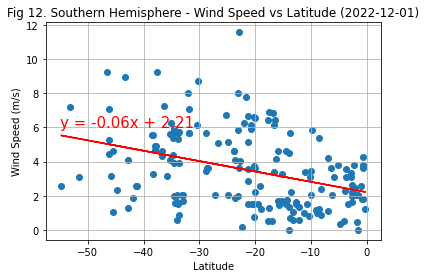

In [66]:
# Specifications
plt.title(f'Fig 12. Southern Hemisphere - Wind Speed vs Latitude ({date})')
plt.ylabel("Wind Speed (m/s)")
xpos=-55
ypos=6

# Linear regression on Northern Hemisphere
linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],xpos,ypos)

# Save and show
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** The regression plots (Figs 11 & 12) suggest that the relationship between wind speed and latitude are very weak in both the Northern and Southern Hemispheres.